## Q1 a & Q2.)

### Importing Dataset.

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CA_housing = fetch_california_housing()
print('CA_housing feature names:', CA_housing.feature_names)


df_data = pd.DataFrame(CA_housing.data, columns = CA_housing.feature_names)
df_target = pd.DataFrame(CA_housing.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis = 1)
print(df)

cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV']
correlation_coefficient = np.corrcoef(df[cols].values.T)
print(correlation_coefficient)

CA_housing feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.4

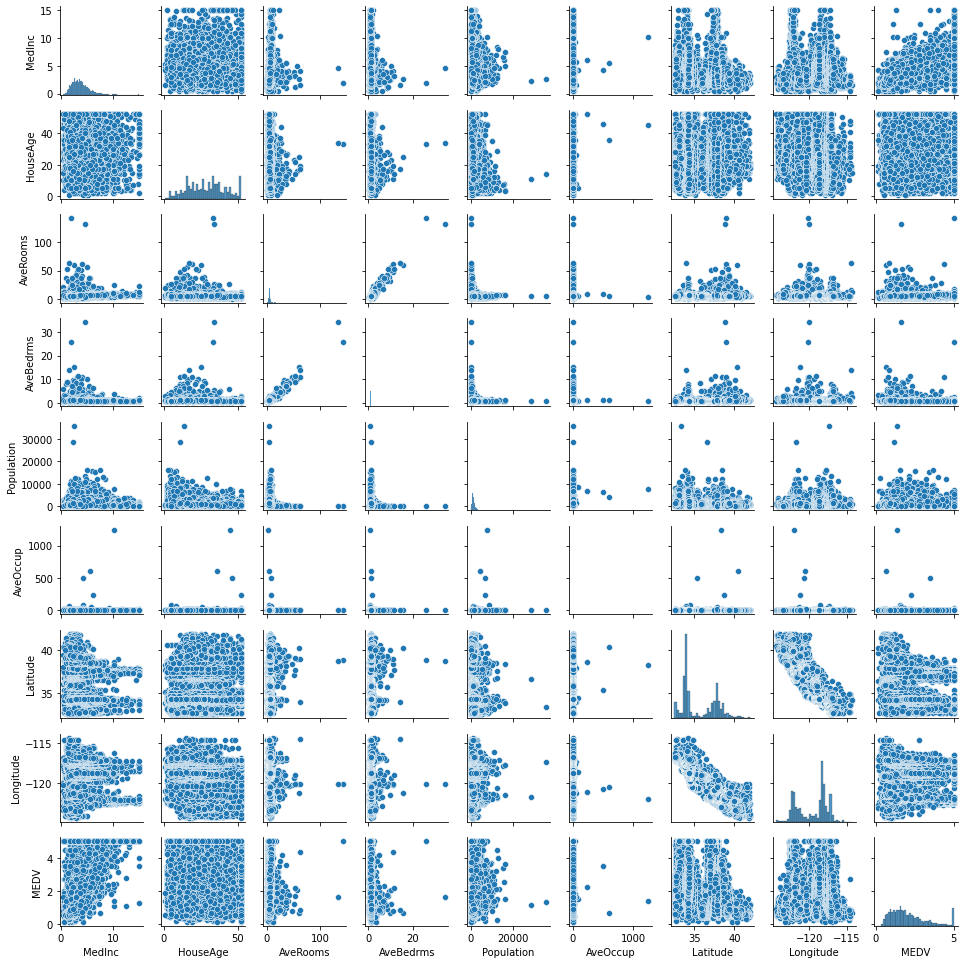

In [52]:
sns.pairplot(df[cols], height = 1.5)
plt.tight_layout()
plt.show()

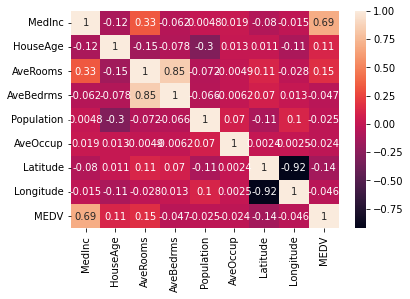

In [53]:
sns.heatmap(correlation_coefficient, annot=True, yticklabels = cols, xticklabels=cols)
plt.show()

### Pre-Processing the data

In [54]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV']].values
y = df[['MEDV']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_test_split(y, shuffle=False)
print("X:", type(X), X.shape)
print("y:", type(y),y.shape)

sc = StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
y_train_std =sc.fit_transform(y_train)
y_test_std =sc.transform(y_test)

X: <class 'numpy.ndarray'> (20640, 9)
y: <class 'numpy.ndarray'> (20640, 1)


### LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression

begin_time = time.time()
lrmodel_original = LinearRegression()
lrmodel_original.fit(X,y)
print(lrmodel_original.score(X,y))
print("Fitting original data, slope = ", lrmodel_original.coef_)
print("Fitting original data, intercept = ", lrmodel_original.intercept_)

lrmodel_std = LinearRegression()
lrmodel_std.fit(X_train_std,y_train_std)
print("Fitting standardized data, slope = ", lrmodel_std.coef_)
print("Fitting standardized data, intercept = ", lrmodel_std.intercept_)

1.0
Fitting original data, slope =  [[-3.46384502e-15 -4.69069228e-15 -1.70002901e-15  4.39362088e-15
   1.38777878e-17 -1.04083409e-16 -1.10154941e-16 -5.39390581e-16
   1.00000000e+00]]
Fitting original data, intercept =  [6.88338275e-14]
Fitting standardized data, slope =  [[-2.94473639e-16 -6.66133815e-16 -1.11022302e-16 -2.77555756e-17
  -3.14852311e-16  5.86336535e-16 -5.55111512e-17 -3.05311332e-16
   1.00000000e+00]]
Fitting standardized data, intercept =  [-2.50108005e-14]


### RANSACRegression

In [56]:
from sklearn.linear_model import RANSACRegressor

begin_time = time.time()
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_loss', residual_threshold=5.0, random_state=1)
ransac.fit(X_train, y_train)

print('Slope: ', ransac.estimator_.coef_)
print ('Intercept : ', ransac.estimator_ . intercept_)

Slope:  [[-1.34201907e-15 -1.02695630e-15 -8.74300632e-16 -5.59188112e-15
   5.55111512e-17  3.64291930e-17  2.90566182e-16  9.24173932e-16
   1.00000000e+00]]
Intercept :  [9.32587341e-14]


### Ridge

In [57]:
from sklearn.linear_model import Ridge

begin_time = time.time()
ridge = Ridge(alpha=0.8)
ridge.fit(X_train_std, y_train_std)

print('Slope: ', ridge.coef_)
print ('Intercept : ', ridge.intercept_)

Slope:  [[ 1.08627161e-04  1.54505912e-05 -3.83152422e-05  4.45249333e-05
  -8.07694538e-09 -5.35446027e-06 -1.14677715e-04 -1.11594349e-04
   9.99851960e-01]]
Intercept :  [-2.50244301e-14]


### Lasso

In [58]:
from sklearn.linear_model import Lasso

begin_time = time.time()
lasso = Lasso(alpha=0.8)
lasso.fit(X_train_std, y_train_std)

print('Slope: ', lasso.coef_)
print ('Intercept : ', lasso.intercept_)

Slope:  [ 0.   0.   0.  -0.  -0.  -0.  -0.  -0.   0.2]
Intercept :  [-5.075386e-15]


## Q1 b.) Non- LinearRegression using Polynomial Features

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

begin_time = time.time()

### Quadratic

quadratic = PolynomialFeatures(degree=2)
X_quadratic = quadratic.fit_transform(X_train_std)
lr_quadratic = LinearRegression()
lr_quadratic.fit(X_quadratic, y_train_std)
print("X_quadratic.shape: ", X_quadratic.shape)
print("Fitting standardized data, slope = ", lr_quadratic.coef_)
print("Fitting standardized data, intercept = ", lr_quadratic.intercept_)

### Cubic

cubic = PolynomialFeatures(degree=3)
X_cubic= cubic.fit_transform(X_train_std)
lr_cubic = LinearRegression()
lr_cubic.fit(X_cubic, y_train_std)
print("X_cubic.shape: ", X_cubic.shape)
print("Fitting standardized data, slope = ", lr_cubic.coef_)
print("Fitting standardized data, intercept = ", lr_cubic.intercept_)

### Decision Tree

tree = DecisionTreeRegressor(max_depth=3)
tree. fit (X_train_std, y_train_std)

X_quadratic.shape:  (13828, 55)
Fitting standardized data, slope =  [[ 5.07054632e-17 -1.44328993e-15 -1.31838984e-16 -2.77555756e-16
  -2.98372438e-16  1.11022302e-16 -2.56739074e-16  1.22124533e-15
   1.22124533e-15  1.00000000e+00 -3.81639165e-17 -2.22044605e-16
   3.05311332e-16 -6.66133815e-16 -2.41126563e-16 -1.94289029e-16
   4.52762827e-16  7.77156117e-16  1.42247325e-16 -1.66533454e-16
   2.22044605e-16  4.02455846e-16  2.18073714e-16  7.97972799e-17
   3.88578059e-16  3.88578059e-16 -8.25728375e-16 -4.99600361e-16
   5.82867088e-16  5.55111512e-16  3.88578059e-16  1.38777878e-16
   1.80411242e-16  1.94289029e-16  2.77555756e-17 -3.46944695e-16
   2.91433544e-16 -5.41233725e-16 -2.22044605e-16  9.71445147e-17
   5.55111512e-17 -4.02455846e-16  1.24900090e-16  4.37150316e-16
   1.66533454e-16  4.16333634e-17 -5.55111512e-17 -1.57512892e-15
   6.93889390e-17  2.63677968e-16 -1.80411242e-16  4.85722573e-16
  -5.03069808e-16  1.52655666e-16  6.24500451e-17]]
Fitting standardized d

DecisionTreeRegressor(max_depth=3)

### Q3.) Analysis of the Algorithms

In [60]:
### LinearRegression

y_train_pred = lrmodel_std.predict(X_train)
y_test_pred = lrmodel_std.predict(X_test)
r2_train = r2_score (y_train_std, y_train_pred)
r2_test = r2_score (y_test_std, y_test_pred)
print('LinearRegression R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for Linear Regression:", time_taken)

### Ransac

y_train_ransac = ransac.predict(X_train)
y_test_ransac = ransac.predict(X_test)
r2_train = r2_score (y_train_std, y_train_ransac)
r2_test = r2_score (y_test_std, y_test_ransac)
print('Ransac R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for RANSAC:", time_taken)

### Ridge

y_train_ridge = ridge.predict(X_train)
y_test_ridge = ridge.predict(X_test)
r2_train = r2_score (y_train_std, y_train_ridge)
r2_test = r2_score (y_test_std, y_test_ridge)
print('Ridge R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for Ridge:", time_taken)

### Lasso

y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)
r2_train = r2_score (y_train_std, y_train_lasso)
r2_test = r2_score (y_test_std, y_test_lasso)
print('Lasso R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for Lasso:", time_taken)

### Non-LinearRegression

## Quadratic
y_pred_quadratic = lr_quadratic.predict(X_quadratic)
r2_quadratic = r2_score(y_train_std, y_pred_quadratic)
print("y_pred_quadratic = ", y_pred_quadratic)
print("R^2 Score of Non-LinearRegression(Quadratic) is:", r2_quadratic)
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for Non Linear Regresson(Quadratic):", time_taken)

## Cubic
y_pred_cubic = lr_cubic.predict(X_cubic)
r2_cubic = r2_score(y_train_std, y_pred_cubic)
print("y_pred_cubic = ", y_pred_cubic)
print("R^2 Score of Non-LinearRegression(Cubic) is:", r2_cubic)
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for Non Linear Regresson(Cubic):", time_taken)

### Decision Tree Regressor
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)
r2_train = r2_score (y_train_std, y_train_tree)
r2_test = r2_score (y_test_std, y_test_tree)
print('Decision Tree Regressor R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))
end_time = time.time()
time_taken = end_time - begin_time
print("Time Taken for Non Linear Regresson(Decision Tree):", time_taken)

LinearRegression R^2 train: -3.295, test:-3.293
Time Taken for Linear Regression: 0.43001270294189453
Ransac R^2 train: -3.295, test:-3.293
Time Taken for RANSAC: 0.4320070743560791
Ridge R^2 train: -3.334, test:-3.333
Time Taken for Ridge: 0.43400096893310547
Lasso R^2 train: 0.237, test:0.241
Time Taken for Lasso: 0.43599653244018555
y_pred_quadratic =  [[-0.73904434]
 [ 1.36115317]
 [-0.0092192 ]
 ...
 [ 0.13379879]
 [ 0.66599906]
 [ 1.02571098]]
R^2 Score of Non-LinearRegression(Quadratic) is: 1.0
Time Taken for Non Linear Regresson(Quadratic): 0.4399855136871338
y_pred_cubic =  [[-0.73904434]
 [ 1.36115317]
 [-0.0092192 ]
 ...
 [ 0.13379879]
 [ 0.66599906]
 [ 1.02571098]]
R^2 Score of Non-LinearRegression(Cubic) is: 1.0
Time Taken for Non Linear Regresson(Cubic): 0.44696664810180664
Decision Tree Regressor R^2 train: -2.377, test:-2.394
Time Taken for Non Linear Regresson(Decision Tree): 0.4519686698913574
